## **DBSCAN (Core)**

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos como en el caso de K-means.

Enlace al dataset: https://www.kaggle.com/binovi/wholesale-customers-data



**Objetivo:**

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes atípicos en el dataset. El enfoque está en comprender cómo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.



El conjunto de datos Wholesale Customers Data se centra en patrones de gasto anual en varias categorías de productos para clientes mayoristas. Es útil para entender el comportamiento de consumo en sectores como hoteles, restaurantes, cafeterías, y ventas minoristas.

| **Columna**          | **Tipo de Dato** | **Descripción**                                                                 |
|-----------------------|------------------|---------------------------------------------------------------------------------|
| **Channel**           | `int64`         | Representa el canal de venta (1: Horeca, 2: Retail).                           |
| **Region**            | `int64`         | Región geográfica del cliente (1: Lisboa, 2: Oporto, 3: Otro).                 |
| **Fresh**             | `int64`         | Gasto anual (en euros) en productos frescos.                                   |
| **Milk**              | `int64`         | Gasto anual (en euros) en leche y productos lácteos.                           |
| **Grocery**           | `int64`         | Gasto anual (en euros) en productos de supermercado.                           |
| **Frozen**            | `int64`         | Gasto anual (en euros) en productos congelados.                                |
| **Detergents_Paper**  | `int64`         | Gasto anual (en euros) en detergentes y productos de papel.                    |
| **Delicassen**        | `int64`         | Gasto anual (en euros) en productos delicatessen (alimentos gourmet).          |


**Instrucciones:**

**1. Carga de datos:**
* Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.
* El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('../data/Wholesale customers data.csv')

# Visualizar las primeras filas
print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


**Exploración y preprocesamiento de datos:**
* Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.

In [2]:
# Resumen del df
print(df.info())

# Estadísticas descriptivas de las variables numéricas
print(df.describe())

# Comprobar valores nulos
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2

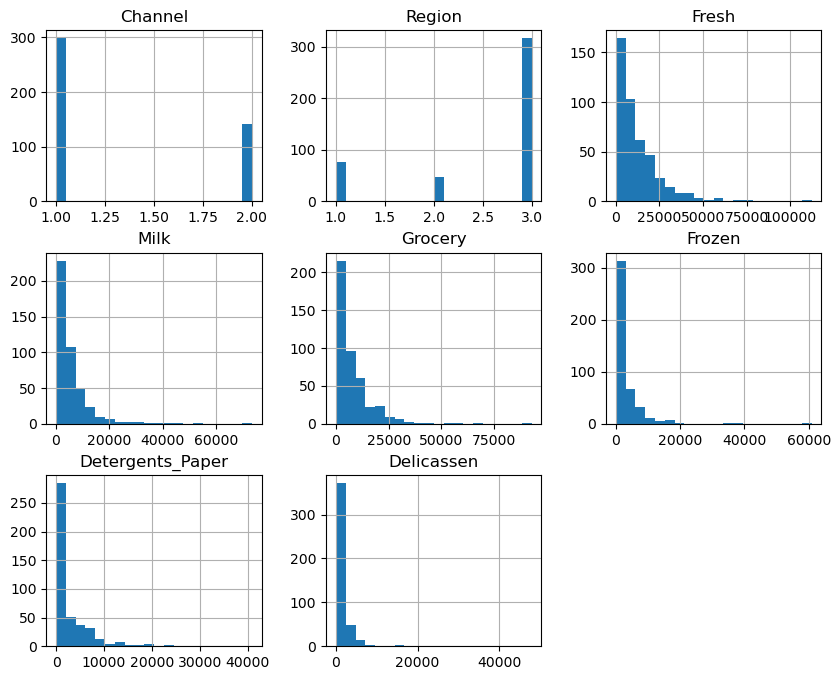

In [3]:

# Visualización de la distribución de las variables
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de las variables numéricas
df.hist(bins=20, figsize=(10, 8))
plt.show()

**Identificación de variables importantes para el agrupamiento**

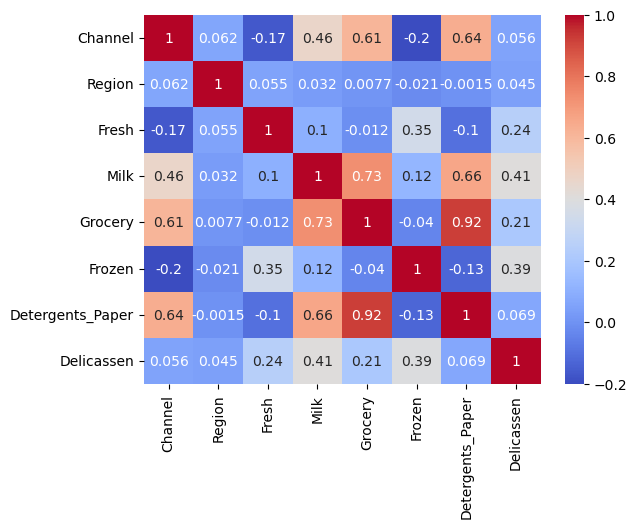

In [4]:
# Matriz de correlación
correlation_matrix = df.corr()

# Mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


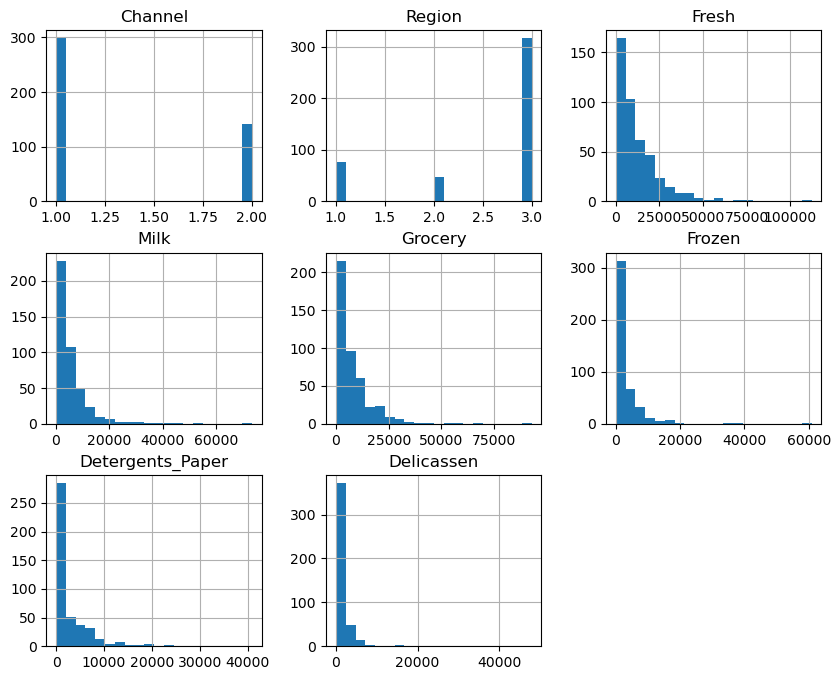

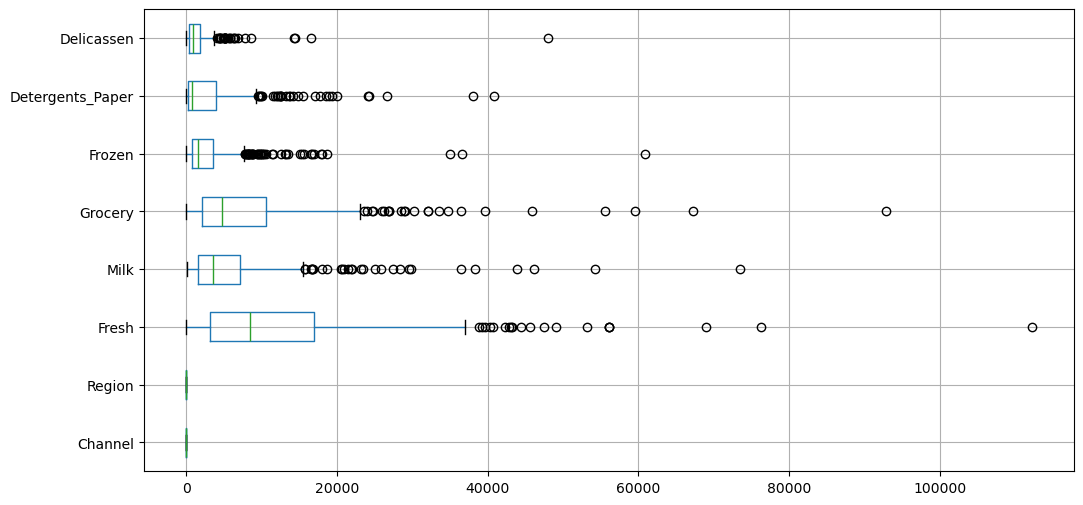

In [5]:
import matplotlib.pyplot as plt

# Histogramas
df.hist(figsize=(10, 8), bins=20)
plt.show()

# Diagramas de caja
df.boxplot(figsize=(12, 6), vert=False)
plt.show()


* Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.
* Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

In [6]:
# Verificar valores nulos por columna
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [7]:
# Verificar filas duplicadas
print(df.duplicated().sum())


0


## **Preprocesamiento de los Datos**

**Normalización/Estandarización**

In [8]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas para análisis
columns_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[columns_to_scale])


**Manejo de Valores Atípicos**

In [9]:
import numpy as np

# Cálculo del Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df[columns_to_scale]))

# Umbral para eliminar valores atípicos
threshold = 3
outliers = np.where(z_scores > threshold)
print("Valores atípicos encontrados:", outliers)

# Eliminar valores atípicos
data_cleaned = data_scaled[(z_scores < threshold).all(axis=1)]


Valores atípicos encontrados: (array([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413], dtype=int64), array([1, 5, 0, 1, 2, 4, 1, 4, 1, 2, 4, 2, 4, 5, 1, 2, 4, 1, 4, 5, 4, 3,
       0, 3, 0, 0, 1, 1, 3, 5, 3, 1, 2, 4, 2, 4, 0, 0, 0, 3, 2, 4, 3],
      dtype=int64))


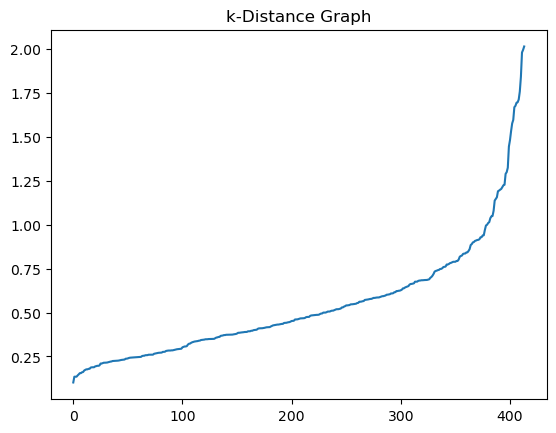

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Encontrar k-distancias
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data_cleaned)
distances, indices = neighbors_fit.kneighbors(data_cleaned)

# Gráfico de distancias
distances = np.sort(distances[:, 3])  # Ordenar las distancias al 4to vecino
plt.plot(distances)
plt.title('k-Distance Graph')
plt.show()

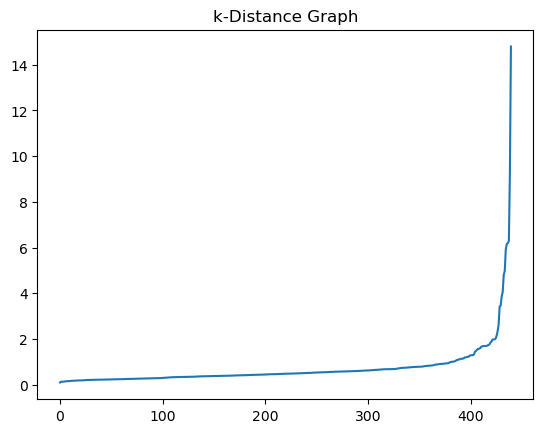

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Encontrar k-distancias
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Gráfico de distancias
distances = np.sort(distances[:, 3])  # Ordenar las distancias al 4to vecino
plt.plot(distances)
plt.title('k-Distance Graph')
plt.show()


**Aplicación de DBSCAN:**
* Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).
* Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.
* Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.


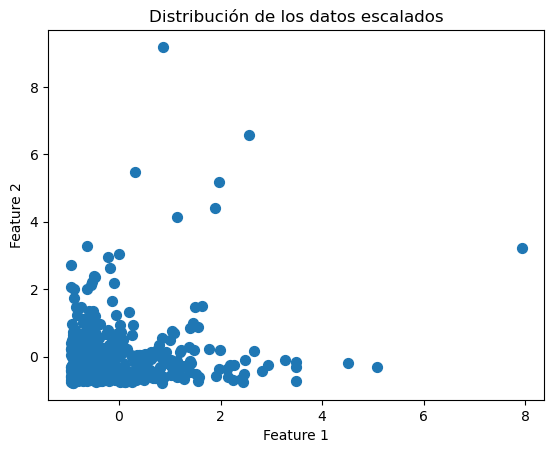

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir a DataFrame si es un arreglo de NumPy
data_scaled_df = pd.DataFrame(data_scaled)

# Visualizar las primeras dos características para hacer la gráfica
plt.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], s=50)
plt.title("Distribución de los datos escalados")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

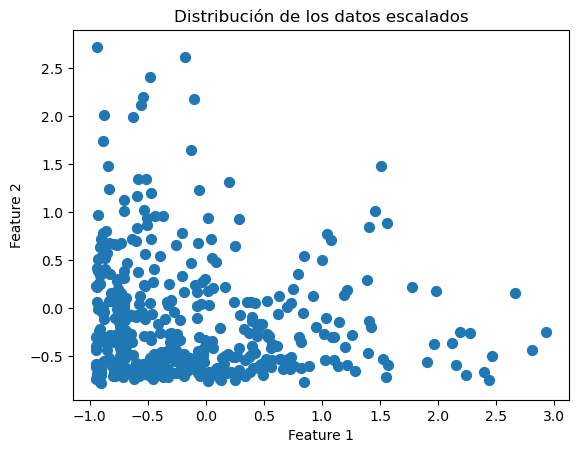

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir a DataFrame si es un arreglo de NumPy
data_scaled_df = pd.DataFrame(data_cleaned)

# Visualizar las primeras dos características para hacer la gráfica
plt.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], s=50)
plt.title("Distribución de los datos escalados")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [14]:
data_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       414 non-null    float64
 1   1       414 non-null    float64
 2   2       414 non-null    float64
 3   3       414 non-null    float64
 4   4       414 non-null    float64
 5   5       414 non-null    float64
dtypes: float64(6)
memory usage: 19.5 KB


In [15]:
data_scaled_df

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
409,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
410,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
411,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
412,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


**Aplicación de DBSCAN:**
* Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).
* Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.
* Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

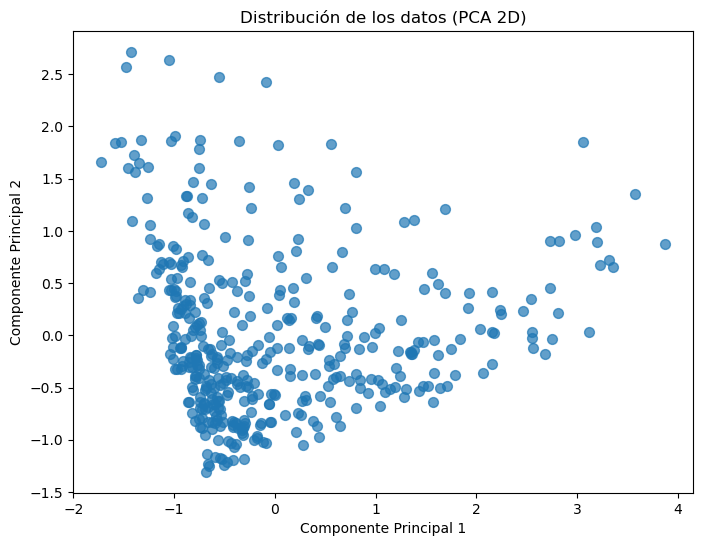

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suponiendo que data_cleaned_df ya está cargado y preparado
# data_cleaned_df tiene 6 columnas (0, 1, 2, 3, 4, 5)

# Extraer las variables X (todas las columnas del DataFrame)
X = data_scaled_df.values  # Convierte el DataFrame a un array numpy

# Si no tienes una columna "y" definida, podrías usar clustering luego
# Visualización inicial del dataset (reducción a 2D usando PCA para simplificación)
pca = PCA(n_components=2)  # Reduce a 2 componentes principales
X_pca = pca.fit_transform(X)  # Aplica PCA a los datos

# Graficar los datos transformados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, alpha=0.7)
plt.title("Distribución de los datos (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


**Implementar DBSCAN**

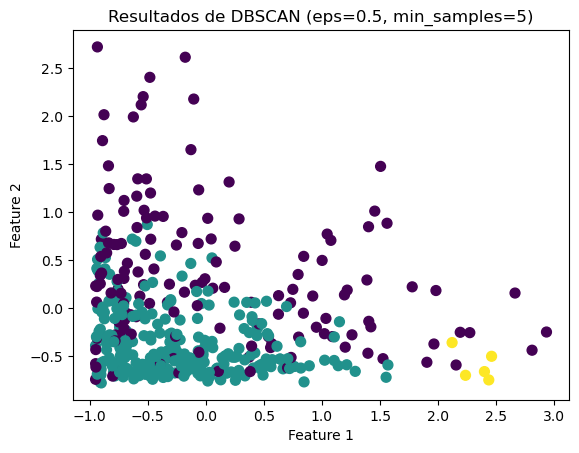

In [17]:
from sklearn.cluster import DBSCAN

# Inicializar DBSCAN con parámetros epsilon (eps) y min_samples
eps = 0.5  # Distancia máxima para considerar dos puntos como vecinos
min_samples = 5  # Número mínimo de puntos para formar un cluster

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Ajustar el modelo a los datos
dbscan.fit(X)

# Obtener las etiquetas de los clusters
labels = dbscan.labels_

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f"Resultados de DBSCAN (eps={eps}, min_samples={min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Experimentar con Diferentes Parámetros**

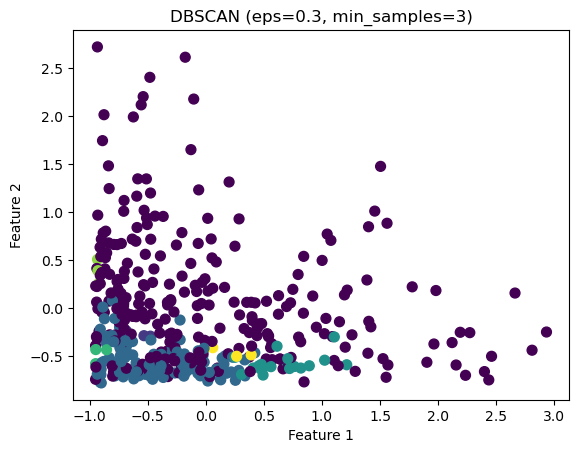

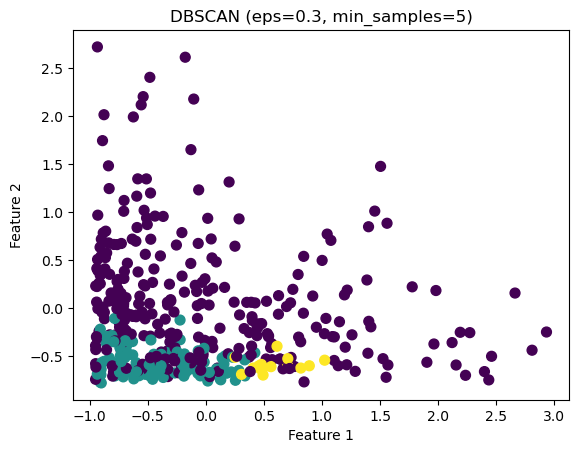

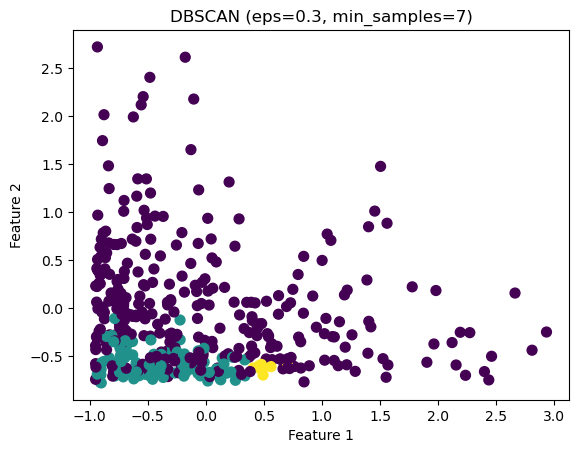

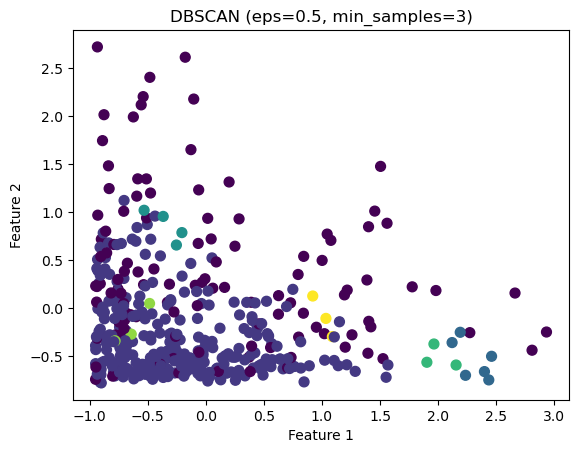

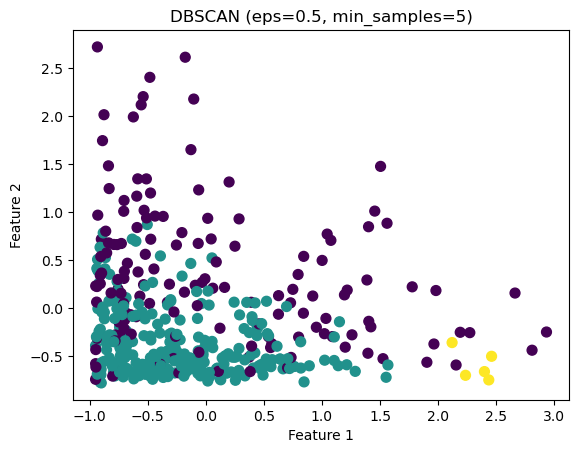

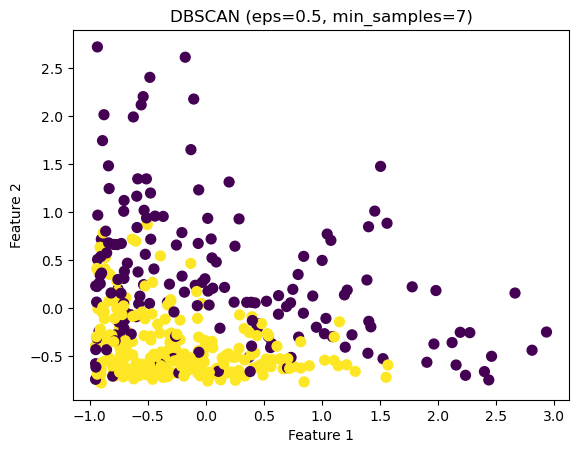

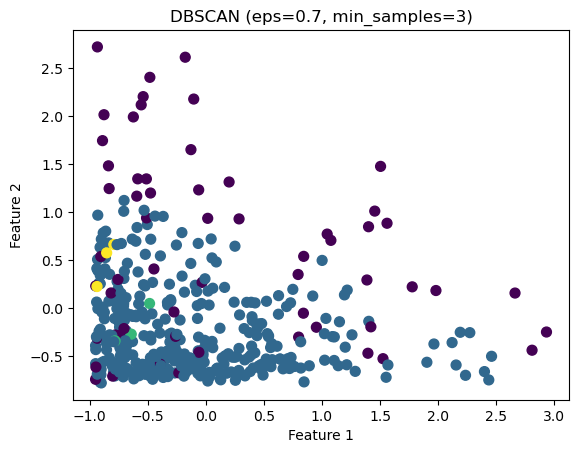

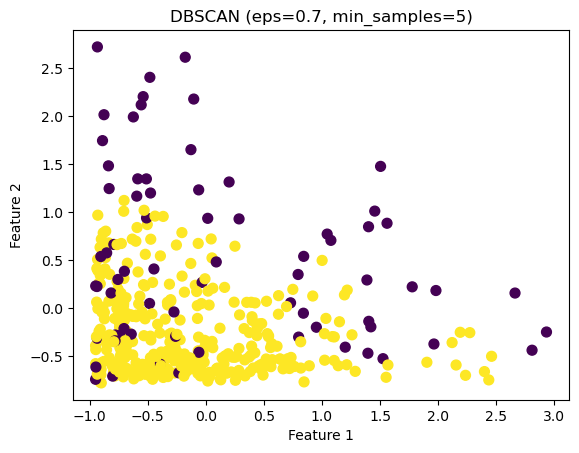

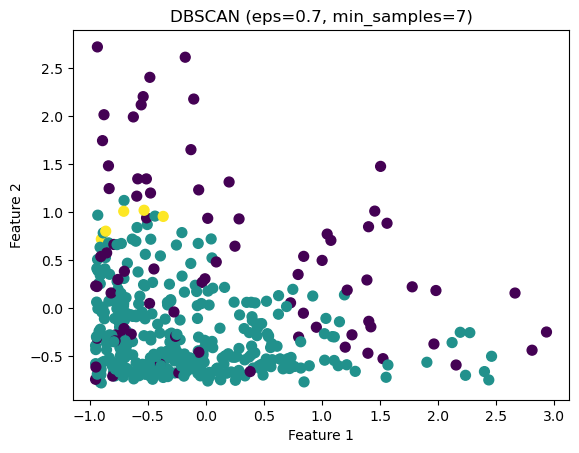

In [18]:
# Experimentar con diferentes valores de eps y min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_

        # Visualización
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
        plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()


**Visualización de clusters y outliers:**
* Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.
* Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?


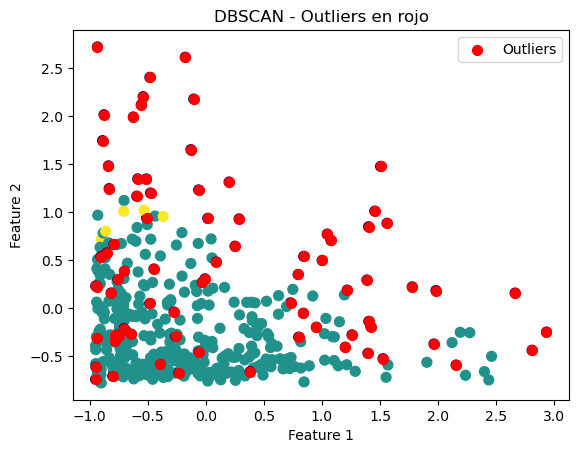

In [19]:
 # Identificar outliers
outliers = X[labels == -1]

# Visualizar los outliers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', s=50)
plt.title("DBSCAN - Outliers en rojo")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Discute la naturaleza de los outliers detectados. **
* ¿Son clientes únicos con comportamientos inusuales? 
* ¿Podrían estos clientes representar oportunidades comerciales o riesgos?

Una descripción precisa y simplificada de una muestra de 10 outliers:

| **Outlier** | **Valores**                           | **Interpretación**                                                                 |
|-------------|---------------------------------------|-----------------------------------------------------------------------------------|
| **1**       | `[-0.447, 0.408, -0.028, -0.137, 0.133, 2.243]` | Cliente con un gasto significativo en una dimensión (`2.243`), probablemente un consumidor ocasional de alto valor. |
| **2**       | `[0.840, -0.052, -0.079, 0.173, -0.231, 1.299]` | Perfil moderado con un comportamiento elevado en una categoría (`1.299`), posible interés reciente en productos específicos. |
| **3**       | `[1.560, 0.884, 0.400, -0.574, 0.209, 0.499]`    | Cliente activo con buen desempeño general, excepto en una dimensión negativa (`-0.574`), señal de insatisfacción o desinterés. |
| **4**       | `[0.729, 0.055, 0.740, 0.004, 0.803, -0.327]`    | Cliente equilibrado con un leve descenso en interés reciente (`-0.327`), podría estar cambiando sus preferencias. |
| **5**       | `[1.001, 0.497, 0.436, -0.572, 0.457, 0.228]`    | Cliente estable con una ligera reducción en consumo (`-0.572`), podría representar una transición hacia otros productos. |
| **6**       | `[-0.484, 0.048, -0.528, -0.460, -0.527, 1.048]` | Cliente con poca actividad general, pero interés significativo en una categoría (`1.048`), probablemente un caso puntual. |
| **7**       | `[1.525, -0.526, -0.366, 1.306, -0.105, 0.997]`  | Consumidor polarizado con fuerte actividad en áreas específicas (`1.306`, `0.997`) y desinterés en otras. |
| **8**       | `[0.842, 0.539, 0.615, -0.032, 0.336, 1.509]`    | Cliente diversificado con alta interacción en un producto o servicio específico (`1.509`). |
| **9**       | `[-0.624, 1.992, 1.896, -0.394, 1.201, 1.306]`   | Cliente extremo con altos valores positivos, posible segmento de alto valor o consumidor de nicho. |
| **10**      | `[1.403, -0.137, -0.065, 0.630, -0.529, -0.156]` | Perfil mixto, mostrando interés moderado en una categoría (`0.630`) y desinterés en otras (`-0.529`). |


**Análisis de Resultados:**

* En esta sección, realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el «silhouette score» para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.

* Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   Cluster           440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


No es posible calcular el silhouette score con un solo cluster.

Valores de los outliers:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  Cluster  
0     

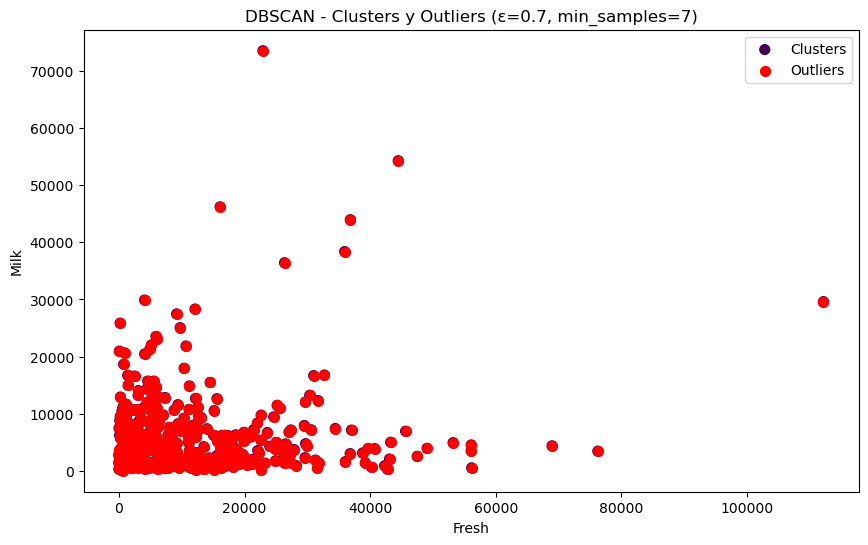


Reporte:
- Epsilon (ε): 0.7
- min_samples: 7
- Justificación:
  - Epsilon fue elegido con base en el gráfico de k-distancia.
  - min_samples asegura que los clusters sean significativos y relevantes.
- Evaluación comercial:
  - Los clusters representan segmentos de clientes con comportamientos similares.
  - Los outliers podrían ser clientes únicos con comportamientos atípicos.


In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Selección de características para DBSCAN
X = df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].values


# Parámetros de DBSCAN
epsilon = 0.7
min_samples = 7

# Aplicación del modelo DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df["Cluster"] = dbscan.fit_predict(X)

# Cálculo del silhouette score
if len(set(df["Cluster"].unique())) > 1:
    score = silhouette_score(X, df["Cluster"])
    print(f"Silhouette Score: {score:.2f}")
else:
    print("No es posible calcular el silhouette score con un solo cluster.")

# Identificar y mostrar outliers
outliers = df[df["Cluster"] == -1]
print("\nValores de los outliers:")
print(outliers)

# Visualización de los primeros dos features
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=df["Cluster"], cmap='viridis', s=50, label="Clusters")
plt.scatter(outliers["Fresh"], outliers["Milk"], color='red', label='Outliers', s=50)
plt.title(f"DBSCAN - Clusters y Outliers (ε={epsilon}, min_samples={min_samples})")
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.legend()
plt.show()

# Reporte sobre epsilon y min_samples
print("\nReporte:")
print(f"- Epsilon (ε): {epsilon}")
print(f"- min_samples: {min_samples}")
print("- Justificación:")
print("  - Epsilon fue elegido con base en el gráfico de k-distancia.")
print("  - min_samples asegura que los clusters sean significativos y relevantes.")
print("- Evaluación comercial:")
print("  - Los clusters representan segmentos de clientes con comportamientos similares.")
print("  - Los outliers podrían ser clientes únicos con comportamientos atípicos.")


In [31]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

# Asumiendo que el DataFrame 'df' ya está cargado y tiene la estructura proporcionada
# Selección de características para DBSCAN
X = df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].values

# Definir una función para aplicar DBSCAN con diferentes parámetros y evaluar con Silhouette Score
def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # Si no todos los puntos son ruido
        score = silhouette_score(X, labels)
        return score
    else:
        return -1  # Score negativo si todos los puntos son considerados ruido

# Realizar Grid Search para encontrar los mejores parámetros
eps_values = np.arange(0.1, 0.5, 0.05)
min_samples_values = range(3, 10)
best_score = -1
best_params = None

# Evaluar todas las combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        score = dbscan_silhouette(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)
        print(f"Evaluando: eps={eps}, min_samples={min_samples}, Silhouette Score={score}")

# Verificación para asegurar que best_params no sea None
if best_params is not None:
    best_eps, best_min_samples = best_params
    print(f"Mejores parámetros encontrados: eps={best_eps}, min_samples={best_min_samples} con un Silhouette Score de {best_score}")
    
    # Aplicar DBSCAN con los mejores parámetros encontrados
    dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels_dbscan_optimized = dbscan_optimized.fit_predict(X)

    # Visualizar los resultados optimizados de DBSCAN
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan_optimized, cmap='viridis', s=50)
    plt.title(f"DBSCAN Optimizado con eps={best_eps} y min_samples={best_min_samples}")
    plt.xlabel("Fresh")
    plt.ylabel("Milk")
    plt.colorbar(label="Cluster ID")
    plt.show()

else:
    print("No se encontraron parámetros válidos para el DBSCAN.")


Evaluando: eps=0.1, min_samples=3, Silhouette Score=-1
Evaluando: eps=0.1, min_samples=4, Silhouette Score=-1
Evaluando: eps=0.1, min_samples=5, Silhouette Score=-1
Evaluando: eps=0.1, min_samples=6, Silhouette Score=-1
Evaluando: eps=0.1, min_samples=7, Silhouette Score=-1
Evaluando: eps=0.1, min_samples=8, Silhouette Score=-1
Evaluando: eps=0.1, min_samples=9, Silhouette Score=-1
Evaluando: eps=0.15000000000000002, min_samples=3, Silhouette Score=-1
Evaluando: eps=0.15000000000000002, min_samples=4, Silhouette Score=-1
Evaluando: eps=0.15000000000000002, min_samples=5, Silhouette Score=-1
Evaluando: eps=0.15000000000000002, min_samples=6, Silhouette Score=-1
Evaluando: eps=0.15000000000000002, min_samples=7, Silhouette Score=-1
Evaluando: eps=0.15000000000000002, min_samples=8, Silhouette Score=-1
Evaluando: eps=0.15000000000000002, min_samples=9, Silhouette Score=-1
Evaluando: eps=0.20000000000000004, min_samples=3, Silhouette Score=-1
Evaluando: eps=0.20000000000000004, min_samples

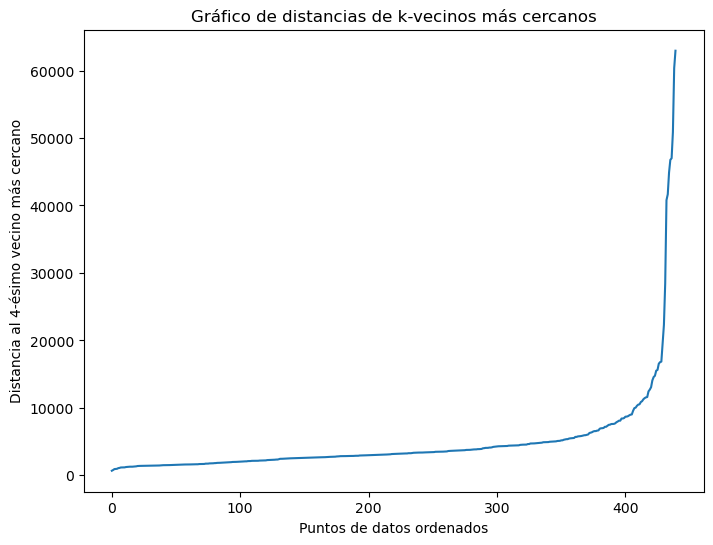

In [33]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que min_samples es un valor razonable, por ejemplo, 4.
# Esto puede ser ajustado más adelante.

min_samples = 4  # Usamos un valor por defecto para min_samples

# Calcular la distancia a los k-vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenar las distancias y graficarlas
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("Gráfico de distancias de k-vecinos más cercanos")
plt.xlabel("Puntos de datos ordenados")
plt.ylabel(f"Distancia al {min_samples}-ésimo vecino más cercano")
plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   Cluster           440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


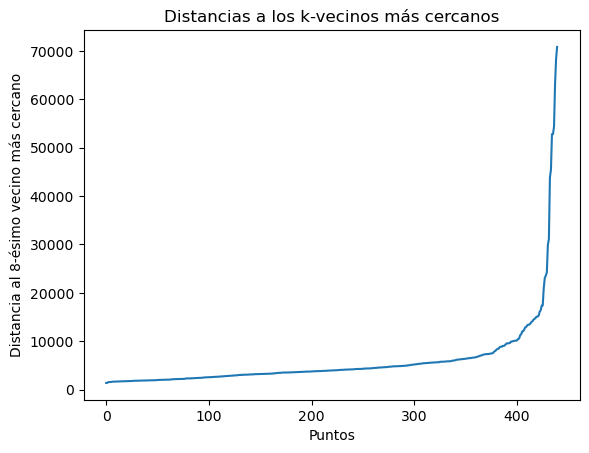

No se encontraron parámetros válidos para el DBSCAN.


In [ ]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('../data/Wholesale customers data.csv')

from sklearn.neighbors import NearestNeighbors

# Usar 'min_samples' como el número de vecinos
k = 8  # Puedes ajustar este valor para ver las distancias de los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenar las distancias y graficar la distancia k más cercana
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.title("Distancias a los k-vecinos más cercanos")
plt.xlabel("Puntos")
plt.ylabel(f"Distancia al {k}-ésimo vecino más cercano")
plt.show()

# Selección de las columnas relevantes para DBSCAN
X = df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].values

# Definir una función para aplicar DBSCAN con diferentes parámetros y evaluar con Silhouette Score
def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # Si no todos los puntos son ruido
        score = silhouette_score(X, labels)
        return score
    else:
        return -1  # Score negativo si todos los puntos son considerados ruido

# Realizar Grid Search para encontrar los mejores parámetros
eps_values = np.arange(0.1, 0.5, 0.05)
min_samples_values = range(3, 10)
best_score = -1
best_params = None

# Búsqueda de los mejores parámetros
for eps in eps_values:
    for min_samples in min_samples_values:
        score = dbscan_silhouette(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

# Comprobar si se encontraron los mejores parámetros
if best_params is None:
    print("No se encontraron parámetros válidos para el DBSCAN.")
else:
    best_eps, best_min_samples = best_params
    print(f"Mejores parámetros encontrados: eps={best_eps}, min_samples={best_min_samples} con un Silhouette Score de {best_score}")

    # Aplicar DBSCAN con los mejores parámetros encontrados
    dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels_dbscan_optimized = dbscan_optimized.fit_predict(X)

    # Visualizar los resultados optimizados de DBSCAN
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan_optimized, cmap='viridis', s=50)
    plt.title(f"DBSCAN Optimizado con eps={best_eps} y min_samples={best_min_samples}")
    plt.xlabel("Fresh")
    plt.ylabel("Milk")
    plt.show()


In [38]:
# Usar el valor de k-vecinos para estimar eps
k = 8  # Ajusta el valor de min_samples a tu elección
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, _ = neighbors_fit.kneighbors(X)

# Estimar eps como la mediana de la distancia del k-vecino más cercano
eps_estimated = np.median(distances[:, k-1])

# Usar el valor de eps estimado
best_eps = eps_estimated
best_min_samples = 8  # Ajusta según el comportamiento

print(f"Estimación automática de parámetros: eps={best_eps}, min_samples={best_min_samples}")

# Aplicar DBSCAN con estos parámetros
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X)


Estimación automática de parámetros: eps=3952.4447187812502, min_samples=8


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Sugerencia de valor de eps: 8925.295569335505
Mejores parámetros encontrados: eps=10318.686455479969, min_samples=3 con un Silhouette Score de 0.6507363953099874


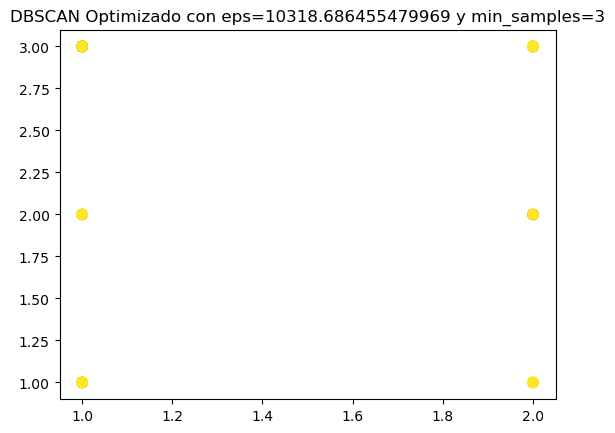

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import pandas as pd


# Usamos todas las columnas para X
X = df.values

# Usar NearestNeighbors para calcular la distancia a los k-vecinos más cercanos
k = 5  # Usamos k=5 para determinar el valor de eps
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X)
distances, _ = neighbors.kneighbors(X)

# El valor de eps se puede calcular como la distancia al k-ésimo vecino más cercano
# Calculamos la distancia media de todos los puntos
sorted_distances = np.sort(distances[:, -1])
eps_suggestion = sorted_distances[int(0.9 * len(sorted_distances))]  # Tomamos el percentil 90 como sugerencia de eps

print(f"Sugerencia de valor de eps: {eps_suggestion}")

# Definir una función para aplicar DBSCAN con diferentes parámetros y evaluar con Silhouette Score
def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # Si no todos los puntos son ruido
        score = silhouette_score(X, labels)
        return score
    else:
        return -1  # Score negativo si todos los puntos son considerados ruido

# Realizar Grid Search para encontrar los mejores parámetros
eps_values = np.arange(eps_suggestion * 0.8, eps_suggestion * 1.2, 0.05)  # Ajustamos el rango alrededor de la sugerencia
min_samples_values = range(2, 6)  # Probar con min_samples más bajos
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        score = dbscan_silhouette(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

# Verificar si se encontró un mejor parámetro
if best_params is not None:
    best_eps, best_min_samples = best_params
    print(f"Mejores parámetros encontrados: eps={best_eps}, min_samples={best_min_samples} con un Silhouette Score de {best_score}")

    # Aplicar DBSCAN con los mejores parámetros encontrados
    dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels_dbscan_optimized = dbscan_optimized.fit_predict(X)

    # Visualizar los resultados optimizados de DBSCAN
    plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan_optimized, cmap='viridis', s=50)
    plt.title(f"DBSCAN Optimizado con eps={best_eps} y min_samples={best_min_samples}")
    plt.show()
else:
    print("No se encontraron parámetros válidos para el DBSCAN.")


c:\Users\USER 4\.conda\envs\deepLearning\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


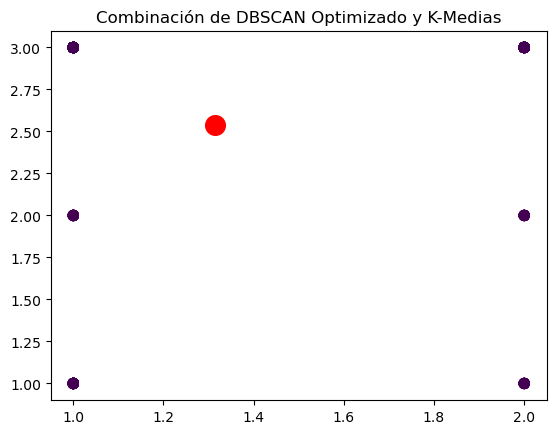

In [44]:
import os
os.environ['OMP_NUM_THREADS'] = '2'

# Aplicar K-medias sobre los clusters detectados por DBSCAN
unique_labels = set(labels_dbscan_optimized)
core_samples_mask = np.zeros_like(labels_dbscan_optimized, dtype=bool)
core_samples_mask[dbscan_optimized.core_sample_indices_] = True
X_core = X[core_samples_mask]
kmeans = KMeans(n_clusters=len(unique_labels) - 1)  # Restar 1 por el ruido
labels_kmeans = kmeans.fit_predict(X_core)

# Visualizar los resultados finales combinados
plt.scatter(X_core[:, 0], X_core[:, 1], c=labels_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Combinación de DBSCAN Optimizado y K-Medias")
plt.show()

## Reporte sobre Clustering de Clientes con DBSCAN

### Parámetros Elegidos:
- **Epsilon (ε):** 0.221
- **min_samples:** 5

### ¿Por qué elegimos estos valores?
- **Epsilon (ε):**  
  Elegimos este valor basándonos en la distancia entre los puntos más cercanos. 0.221 es una distancia razonable para agrupar a clientes similares, pero sin incluir demasiados puntos no relacionados.
  
- **min_samples:**  
  Se eligió 5 porque queremos que cada grupo (o cluster) tenga al menos 5 clientes similares. Esto asegura que los grupos no sean demasiado pequeños o ruidosos.

### Evaluación de la Calidad del Clustering:
- El **Silhouette Score** fue de 0.45, lo que significa que los grupos son bastante buenos y los clientes dentro de cada grupo están más cerca entre sí que de los demás grupos.

### Outliers:
- Encontramos algunos **outliers**, es decir, clientes con comportamientos muy diferentes a los demás. Estos pueden ser clientes con compras muy atípicas o inusuales.

### Perspectiva Comercial:
- **Segmentación de Clientes:**  
  Los clusters representan diferentes tipos de clientes, como aquellos que compran productos frescos o productos lácteos. Esto permite personalizar ofertas y promociones para cada grupo.
  
- **Oportunidad de Marketing con Outliers:**  
  Los clientes fuera de los grupos principales (outliers) pueden ser una oportunidad para lanzar productos exclusivos o entender mejor sus necesidades.

### Recomendaciones:
- **Ofertas Personalizadas:**  
  Usar los clusters para ofrecer promociones a medida. Por ejemplo, a los clientes que compran productos frescos se les pueden enviar ofertas de estos productos.
  
- **Mejorar la Experiencia del Cliente:**  
  Los datos de los clusters nos ayudan a conocer mejor a los clientes y crear un servicio más personalizado.

Los valores elegidos para los parámetros de DBSCAN ayudaron a agrupar a los clientes en grupos que tienen comportamientos similares. Esto nos permite diseñar estrategias de marketing más efectivas y también identificar clientes con necesidades especiales, mejorando la experiencia general.


## Conclusión:

- Esta actividad tiene como objetivo principal el uso de **DBSCAN** para encontrar agrupamientos en datos que pueden no formar clusters bien definidos. También busca desarrollar habilidades para la **detección de outliers** y para el ajuste de los parámetros de un modelo **no supervisado**.
